# 6.4 Machine Learning Part 1

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Data prep for regression analysis

#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensuring the chart displayes in the notebook instead of having to call them specifically. 
%matplotlib inline

In [3]:
# Importing datafram
path = r"C:\Users\quinn\PycharmProjects\Netflix Analysis 07-23-2021"
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'netflix_checked.csv'), index_col = False)

### 2. Data cleaning

In [4]:
# Looking at the head of the data frame
df.head()

,Unnamed: 0,Unnamed: 0.1,cast,type,title,country,date_added,release_year,description,director,duration,listed_in,rating,rt_info,rt_cast,rt_audience_score,rt_audience_#reviews,rt_tomatometer_score,rt_critics_#reviews,rt_critic_review
0,0,s2,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Movie,7:19,Mexico,23-Dec-16,2016,After a devastating earthquake hits Mexico Cit...,Jorge Michel Grau,93 min,"Dramas, International Movies",TV-MA,"{'Genre': 'drama', 'Original Language': 'Spani...","{'Elsa - Eloisa Delfin': 'Carmen Beato', 'Fern...",52.0,10,100.0,10.0,[{'Review': 'The intentions of this film are c...
1,1,s3,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Movie,23:59,Singapore,20-Dec-18,2011,"When an army recruit is found dead, his fellow...",Gilbert Chan,78 min,"Horror Movies, International Movies",R,"{'Genre': 'horror', 'Original Language': 'Chin...","{'Boss': 'Philip Hersh', 'Tan': 'Tedd Chan', '...",20.0,10,NaN,0.0,NaN
2,2,s4,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Movie,9,United States,16-Nov-17,2009,"In a postapocalyptic world, rag-doll robots hi...",Shane Acker,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",PG-13,NaN,NaN,56.0,NaN,57.0,NaN,NaN
3,3,s5,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Movie,21,United States,1-Jan-20,2008,A brilliant group of students become card-coun...,Robert Luketic,123 min,Dramas,PG-13,"{'Genre': 'romance, comedy, drama', 'Original ...","{'Justin Sellers': 'Matt Wheeler', 'Sam Presco...",17.0,10,NaN,0.0,"[{'Review': 'Empty calories, yes, but tasty en..."
4,4,s7,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Movie,122,Egypt,1-Jun-20,2019,"After an awful accident, a couple admitted to ...",Yasir Al Yasiri,95 min,"Horror Movies, International Movies",TV-MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping both unnamed
df_1=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [6]:
# Makeing sure it worked 
df_1.head()

,cast,type,title,country,date_added,release_year,description,director,duration,listed_in,rating,rt_info,rt_cast,rt_audience_score,rt_audience_#reviews,rt_tomatometer_score,rt_critics_#reviews,rt_critic_review
0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Movie,7:19,Mexico,23-Dec-16,2016,After a devastating earthquake hits Mexico Cit...,Jorge Michel Grau,93 min,"Dramas, International Movies",TV-MA,"{'Genre': 'drama', 'Original Language': 'Spani...","{'Elsa - Eloisa Delfin': 'Carmen Beato', 'Fern...",52.0,10,100.0,10.0,[{'Review': 'The intentions of this film are c...
1,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Movie,23:59,Singapore,20-Dec-18,2011,"When an army recruit is found dead, his fellow...",Gilbert Chan,78 min,"Horror Movies, International Movies",R,"{'Genre': 'horror', 'Original Language': 'Chin...","{'Boss': 'Philip Hersh', 'Tan': 'Tedd Chan', '...",20.0,10,NaN,0.0,NaN
2,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Movie,9,United States,16-Nov-17,2009,"In a postapocalyptic world, rag-doll robots hi...",Shane Acker,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",PG-13,NaN,NaN,56.0,NaN,57.0,NaN,NaN
3,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Movie,21,United States,1-Jan-20,2008,A brilliant group of students become card-coun...,Robert Luketic,123 min,Dramas,PG-13,"{'Genre': 'romance, comedy, drama', 'Original ...","{'Justin Sellers': 'Matt Wheeler', 'Sam Presco...",17.0,10,NaN,0.0,"[{'Review': 'Empty calories, yes, but tasty en..."
4,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Movie,122,Egypt,1-Jun-20,2019,"After an awful accident, a couple admitted to ...",Yasir Al Yasiri,95 min,"Horror Movies, International Movies",TV-MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_1.shape

(9657, 18)

##### Missing Values

In [8]:
# checking for missing values
df_1.isnull().sum()

cast                     805
type                       0
title                      0
country                  577
date_added                54
release_year               0
description                0
director                4120
duration                   0
listed_in                  0
rating                     0
rt_info                 4084
rt_cast                 4501
rt_audience_score       4549
rt_audience_#reviews    4030
rt_tomatometer_score    5418
rt_critics_#reviews     4043
rt_critic_review        5206
dtype: int64

There are missing values for the data. The cast, director, info, # reviews, and critic review are not nessisarry most of them arre string the nuymber of revieww is how many people actually reviewd the movie or tv show.

In [9]:
# makeing the rt audience score and tomatometer score meadian 
df_1['rt_audience_score'].fillna(df_1['rt_audience_score'].median(), inplace=True)
df_1['rt_tomatometer_score'].fillna(df_1['rt_tomatometer_score'].median(), inplace=True)

In [10]:
df_1.isnull().sum()

cast                     805
type                       0
title                      0
country                  577
date_added                54
release_year               0
description                0
director                4120
duration                   0
listed_in                  0
rating                     0
rt_info                 4084
rt_cast                 4501
rt_audience_score          0
rt_audience_#reviews    4030
rt_tomatometer_score       0
rt_critics_#reviews     4043
rt_critic_review        5206
dtype: int64

##### Duplicates Check

In [11]:
# Checking for duplicates
dups = df_1.duplicated()

In [12]:
dups.shape

(9657,)

No duplicates

In [13]:
# saving data
df_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'netflix_revised.csv'))

### 3. Data prep for regression analysis

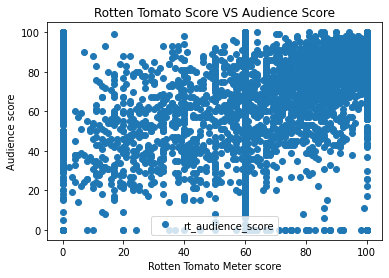

In [13]:
# makeing a scatter plot to look at the data
df_1.plot(x = 'rt_tomatometer_score', y='rt_audience_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rotten Tomato Score VS Audience Score')  
plt.xlabel('Rotten Tomato Meter score')  
plt.ylabel('Audience score')  
plt.show()

### Hypotheses
###### The higher the rotten tomato score the higher people will rate the movie \tv show

In [14]:
#Reshapeing the variables into Numpy arrays and putting them into seperate objects
X = df_1['rt_tomatometer_score'].values.reshape(-1,1)
y = df_1['rt_audience_score'].values.reshape(-1,1)

In [15]:
# Checking the varibales
X

array([[100.],
       [ 60.],
       [ 57.],
       ...,
       [ 60.],
       [ 60.],
       [  0.]])

In [16]:
y

array([[52.],
       [20.],
       [56.],
       ...,
       [67.],
       [67.],
       [62.]])

In [17]:
# Spliting the data into traning set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [18]:
# creating the regression object
regression= LinearRegression()

In [19]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicting the values of y using x
y_predicted = regression.predict(X_test)

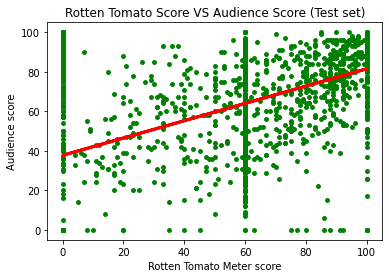

In [21]:
# Createiing a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rotten Tomato Score VS Audience Score (Test set)')
plot_test.xlabel('Rotten Tomato Meter score')
plot_test.ylabel('Audience score')
plot_test.show()

##### My interpitaion of the graph
It looks like there is a positive trend to the graph but most of the points are all around so I dont think the predicted is going to look good

In [22]:
#Creating a object that contains the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [23]:
# Priting the summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.43824395]]
Mean squared error:  423.72404891998974
R2 score:  0.2373844577287989


In [24]:
# Comparing the predicted y values with the actual y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,67.0,64.019686
1,15.0,55.254807
2,67.0,64.019686
3,67.0,64.019686
4,67.0,64.019686
5,0.0,37.725049
6,31.0,44.298708
7,67.0,64.019686
8,67.0,64.019686
9,67.0,64.019686


#### My thoghts
the predicted is within 10 for most of the points but there are also a lot of points that have 0 and the predicted has 37. It really does not show a relathionship between the auddince score and the tomato meter score very well.


Some reflectrions on this graph is see if there is a better way to look at this data to find a correlations all the data points are all over the graph 